In [1]:
#import statements
import pandas as pd
import numpy as np
import re 
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
#importing the data into the notebook
train_data = pd.read_csv("/resources/data/Walmart/fiveclasses_train.csv")
train_data.head()

features = ["Weekday", "NumItems", "Return", 'ACCESSORIES',
       'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
       'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
       'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
       'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING',  'MENSWEAR',
       'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
       'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
       'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
       'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
       'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
       'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
       'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Feature Building
def transform_my_data(data):
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    data[dummies.columns] = dummies 
    data_dummies = data.iloc[:,7:]
    data_dummies = data_dummies.apply(lambda x: x*data["ScanCount"])
    data_dummies = data_dummies.replace(-0,0)

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
    data = data.rename(columns={"ScanCount":"NumItems"})
    data = pd.concat([data, data_dummies], axis=1)
    grouped = data.groupby("VisitNumber")
    grouped = grouped.agg({'Weekday': np.max, "TripType": np.max, 'NumItems': np.sum, 'Return': np.max, 
              '1-HR PHOTO': np.sum, 'ACCESSORIES': np.sum,
       'AUTOMOTIVE': np.sum, 'BAKERY': np.sum, 'BATH AND SHOWER': np.sum, 'BEAUTY': np.sum, 'BEDDING': np.sum,
       'BOOKS AND MAGAZINES': np.sum, 'BOYS WEAR': np.sum, 'BRAS & SHAPEWEAR': np.sum,
       'CAMERAS AND SUPPLIES': np.sum, 'CANDY, TOBACCO, COOKIES': np.sum, 'CELEBRATION': np.sum,
       'COMM BREAD': np.sum, 'CONCEPT STORES': np.sum, 'COOK AND DINE': np.sum, 'DAIRY': np.sum, 'DSD GROCERY': np.sum,
       'ELECTRONICS': np.sum, 'FABRICS AND CRAFTS': np.sum, 'FINANCIAL SERVICES': np.sum,
       'FROZEN FOODS': np.sum, 'FURNITURE': np.sum, 'GIRLS WEAR, 4-6X  AND 7-14': np.sum,
       'GROCERY DRY GOODS': np.sum, 'HARDWARE': np.sum, 'HEALTH AND BEAUTY AIDS': np.sum, 'HOME DECOR': np.sum,
       'HOME MANAGEMENT': np.sum, 'HORTICULTURE AND ACCESS': np.sum,
       'HOUSEHOLD CHEMICALS/SUPP': np.sum, 'HOUSEHOLD PAPER GOODS': np.sum,
       'IMPULSE MERCHANDISE': np.sum, 'INFANT APPAREL': np.sum, 'INFANT CONSUMABLE HARDLINES': np.sum,
       'JEWELRY AND SUNGLASSES': np.sum, 'LADIES SOCKS': np.sum, 'LADIESWEAR': np.sum,
       'LARGE HOUSEHOLD GOODS': np.sum, 'LAWN AND GARDEN': np.sum, 'LIQUOR,WINE,BEER': np.sum,
       'MEAT - FRESH & FROZEN': np.sum, 'MEDIA AND GAMING': np.sum,'MENSWEAR': np.sum,
       'OFFICE SUPPLIES': np.sum, 'OPTICAL - FRAMES': np.sum, 'OPTICAL - LENSES': np.sum,
       'OTHER DEPARTMENTS': np.sum, 'PAINT AND ACCESSORIES': np.sum, 'PERSONAL CARE': np.sum,
       'PETS AND SUPPLIES': np.sum, 'PHARMACY OTC': np.sum, 'PHARMACY RX': np.sum,
       'PLAYERS AND ELECTRONICS': np.sum, 'PLUS AND MATERNITY': np.sum, 'PRE PACKED DELI': np.sum,
       'PRODUCE': np.sum, 'SEAFOOD': np.sum, 'SEASONAL': np.sum, 'SERVICE DELI': np.sum, 'SHEER HOSIERY': np.sum,
       'SHOES': np.sum, 'SLEEPWEAR/FOUNDATIONS': np.sum, 'SPORTING GOODS': np.sum,
       'SWIMWEAR/OUTERWEAR': np.sum, 'TOYS': np.sum, 'WIRELESS': np.sum})
    data = grouped[["TripType", "Weekday", "NumItems", "Return",'1-HR PHOTO', 'ACCESSORIES',
           'AUTOMOTIVE', 'BAKERY', 'BATH AND SHOWER', 'BEAUTY', 'BEDDING',
           'BOOKS AND MAGAZINES', 'BOYS WEAR', 'BRAS & SHAPEWEAR',
           'CAMERAS AND SUPPLIES', 'CANDY, TOBACCO, COOKIES', 'CELEBRATION',
           'COMM BREAD', 'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
           'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
           'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
           'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
           'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
           'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
           'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
           'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
           'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
           'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENSWEAR',
           'OFFICE SUPPLIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES',
           'OTHER DEPARTMENTS', 'PAINT AND ACCESSORIES', 'PERSONAL CARE',
           'PETS AND SUPPLIES', 'PHARMACY OTC', 'PHARMACY RX',
           'PLAYERS AND ELECTRONICS', 'PLUS AND MATERNITY', 'PRE PACKED DELI',
           'PRODUCE', 'SEAFOOD', 'SEASONAL', 'SERVICE DELI', 'SHEER HOSIERY',
           'SHOES', 'SLEEPWEAR/FOUNDATIONS', 'SPORTING GOODS',
           'SWIMWEAR/OUTERWEAR', 'TOYS', 'WIRELESS']]
    
    
    #data.head()
    return data

train_data=transform_my_data(train_data)
train_data.shape
#train_data.head()

(15195, 71)

In [3]:
#Data preprocesssing dropping na and splitting data into test and train
train, test = train_test_split(train_data, test_size = 0.3)
test=test.dropna()
train=train.dropna()
train_data = train
train_data.describe()
train_data.shape

(10636, 71)

In [4]:
#Data preprocesssing
#Transforming qualitative variables into quantitative
def transform(day,no):
    global train_data
    train_data=train_data.replace(day,no)
    return;
transform("Monday", 1)
transform("Tuesday", 2)
transform("Wednesday", 3)
transform("Thursday", 4)
transform("Friday", 5)
transform("Saturday", 6)
transform("Sunday", 7)

#Removing redundency in department description column
train_data=train_data.replace("MENS WEAR","MENSWEAR")

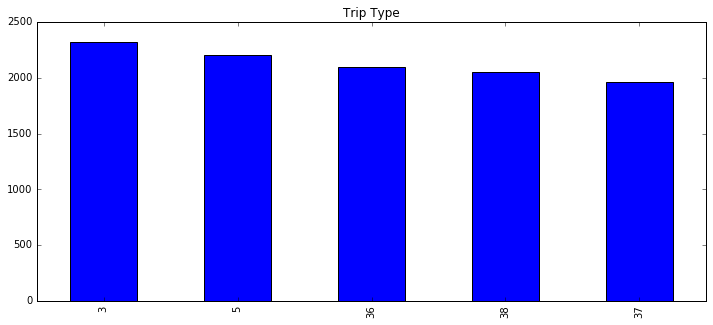

In [5]:

#ploting the histogram for the trip type 
#data_tripty = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['TripType'].value_counts().plot('bar',title="Trip Type")

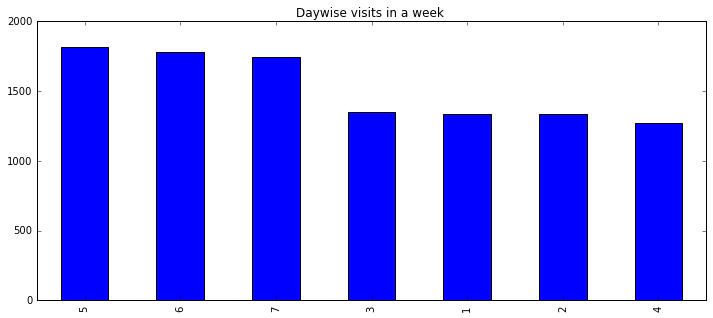

In [6]:
#ploting histogram for daywise visits
#data_tripwd = train_data.drop_duplicates("VisitNumber")
plt.figure(figsize=(12,5))
train_data['Weekday'].value_counts().plot('bar',title="Daywise visits in a week ")

In [7]:
train_data.T.apply(lambda x: x.nunique(),axis=1)

TripType                       5
Weekday                        7
NumItems                      64
Return                         2
1-HR PHOTO                     5
ACCESSORIES                    5
AUTOMOTIVE                     6
BAKERY                         8
BATH AND SHOWER                7
BEAUTY                        21
BEDDING                        3
BOOKS AND MAGAZINES            5
BOYS WEAR                      5
BRAS & SHAPEWEAR               5
CAMERAS AND SUPPLIES           2
CANDY, TOBACCO, COOKIES        9
CELEBRATION                    6
COMM BREAD                    12
CONCEPT STORES                 2
COOK AND DINE                 10
DAIRY                         22
DSD GROCERY                   19
ELECTRONICS                    3
FABRICS AND CRAFTS             6
FINANCIAL SERVICES            14
FROZEN FOODS                  15
FURNITURE                      5
GIRLS WEAR, 4-6X  AND 7-14     7
GROCERY DRY GOODS             35
HARDWARE                       6
          

In [8]:
#train_data_dup = train_data.drop_duplicates("VisitNumber")
def get_count(values):
    return len(values)
grouped_count = train_data.groupby(['Weekday',"TripType"]).TripType.agg(get_count)
grouped_count

Weekday  TripType
1        3           256
         5           267
         36          258
         37          248
         38          308
2        3           297
         5           296
         36          248
         37          217
         38          278
3        3           306
         5           311
         36          246
         37          229
         38          257
4        3           270
         5           306
         36          242
         37          213
         38          242
5        3           506
         5           350
         36          366
         37          306
         38          289
6        3           396
         5           362
         36          403
         37          327
         38          291
7        3           291
         5           311
         36          334
         37          421
         38          388
Name: TripType, dtype: int64

In [9]:
l=train_data.groupby(['Weekday'])

In [10]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc = knc.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

predictions = knc.predict(np.asarray(test[features]))

In [11]:
#Accuracy of KNN
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(test.TripType,predictions )

0.86137310813774948

In [12]:
#pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

          3       0.94      0.98      0.96      1007
          5       0.84      0.84      0.84       912
         36       0.86      0.85      0.85       928
         37       0.85      0.81      0.83       833
         38       0.80      0.81      0.81       879

avg / total       0.86      0.86      0.86      4559



In [10]:
#Logistic Regression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
train_data.TripType = train_data.TripType.astype(float)
train_data.Weekday = train_data.Weekday.astype(float)  
                         
test.TripType = test.TripType.astype(float)
test.Weekday = test.Weekday.astype(float)  


In [11]:
lr = LogisticRegression()
lr.fit(X = np.asarray(train_data[features]), y = np.asarray(train_data.TripType))



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
predictions = lr.predict(np.asarray(test[features]))

In [15]:
#Accuracy of logistic regression
accuracy_score(test.TripType,predictions )

0.90480368501864439

In [17]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.98      0.98      0.98      1007
        5.0       0.87      0.88      0.88       912
       36.0       0.89      0.89      0.89       928
       37.0       0.89      0.87      0.88       833
       38.0       0.84      0.86      0.85       879

avg / total       0.90      0.90      0.90      4559



In [89]:
#Naive Bayes
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [90]:
gnb = GaussianNB()

gnb = gnb.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
prediction = gnb.predict(np.asarray(test[features]))



In [91]:
#Accuracy of naive Bayes
accuracy_score(test.TripType,prediction )

0.59881552972143015

In [98]:
pd.crosstab(test.TripType,prediction , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,995,5,12,6,21,1039
5.0,303,489,51,21,58,922
36.0,53,413,291,20,118,895
37.0,12,67,22,280,484,865
38.0,11,56,24,72,675,838
All,1374,1030,400,399,1356,4559


In [30]:
accuracy_score(test.TripType,prediction )

0.59464794911164731

In [18]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

In [19]:
#Accuracy of Decision Tree
accuracy_score(test.TripType,predictions )

0.85194121517876731

In [20]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.95      0.98      0.97      1007
        5.0       0.83      0.83      0.83       912
       36.0       0.83      0.82      0.83       928
       37.0       0.85      0.81      0.83       833
       38.0       0.78      0.80      0.79       879

avg / total       0.85      0.85      0.85      4559



In [97]:
#SVM
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovr')
clf = clf.fit(np.asarray(train_data[features]), 
                    np.asarray(train_data.TripType))

In [35]:
predictions = clf.predict(np.asarray(test[features]))

In [36]:
#Accuracy of SVM
accuracy_score(test.TripType,predictions )

0.88835270892739637

In [37]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3.0,5.0,36.0,37.0,38.0,All
True,,,,,,
3.0,1020,24,4,3,3,1054
5.0,12,816,45,13,23,909
36.0,4,92,738,14,35,883
37.0,3,17,10,731,83,844
38.0,5,31,24,64,745,869
All,1044,980,821,825,889,4559


In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
walmart_rf = RandomForestClassifier(n_estimators=100)
walmart_rf = walmart_rf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = walmart_rf.predict(np.asarray(test[features]))


In [22]:
#Accuracy of Random Forest
accuracy_score(test.TripType,predictions )


0.88484316736126345

In [23]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.97      0.98      0.97      1007
        5.0       0.85      0.86      0.85       912
       36.0       0.86      0.86      0.86       928
       37.0       0.87      0.88      0.88       833
       38.0       0.86      0.84      0.85       879

avg / total       0.88      0.88      0.88      4559



In [24]:
#LDA
from sklearn.lda import LDA
clf = LDA()
clf = clf.fit(np.asarray(train_data[features]), np.asarray(train_data.TripType))
predictions = clf.predict(np.asarray(test[features]))

/usr/local/lib/python3.4/dist-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [25]:
# Accuracy of LDA
accuracy_score(test.TripType,predictions )

0.86181180083351616

In [26]:
pd.crosstab(test.TripType,predictions , rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(test["TripType"], predictions))

             precision    recall  f1-score   support

        3.0       0.96      0.91      0.93      1007
        5.0       0.74      0.91      0.82       912
       36.0       0.90      0.84      0.87       928
       37.0       0.94      0.76      0.84       833
       38.0       0.82      0.87      0.84       879

avg / total       0.87      0.86      0.86      4559



In [44]:
train_data.head()

,TripType,Weekday,NumItems,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
50694,37.0,6.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98374,38.0,6.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84385,5.0,4.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166737,38.0,3.0,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117588,3.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
train_data.to_csv("featureData.csv", sep=',')